- `Written By   :` Mazi Boustani
- `Date         :` 08/05/2021
- `Purpose      :` Intoduction to Deep Learning and step by step code for traning a binary classification neural network from scratch to predict MNIST 0 and 1 digits

All images captured from: https://youtu.be/5tvmMX8r_OM

![NN](https://miro.medium.com/max/1100/0*61ZaNNpbpMtZLLpZ. "MNIST Neural Network")
<center>[image source](https://www.youtube.com/watch?v=Ilg3gGewQ5U&t=522s&ab_channel=3Blue1Brown)</center>

## What is deep learning?

![what_is_deep_learning](images/what_is_deep_learning.png)

# Two Supervised Learning algorithms

### Regression
Regression predictive modeling is the task of approximating a mapping function (f) from input variables (X) to a continuous output variable (y).

A continuous output variable is a real-value, such as an integer or floating point value. These are often quantities, such as amounts and sizes.

### Classification
Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

The output variables are often called labels or categories. The mapping function predicts the class or category for a given observation.

## The Perceptron

The Perceptron (single neural) is fundamental building block of deep learning.

Set of input multiply with corresponding weights and summed all together. Then pass it to an activation function.

![the_perceptron](images/the_perceptron.png)

All activation functions
![activation_functions](images/activation_functions.png)


Why using non linear activation function? Because we mostly see no linear data these days.
![importance_activation_function](images/importance_activation_function.png)


![single_layer_NN](images/single_layer_NN.png)

![example_problem_NN](images/example_problem_NN.png)

![quantify_loss](images/quantify_loss.png)

![cost_function](images/cost_function.png)

![binary_cross_entropy_loss](images/binary_cross_entropy_loss.png)

![MSE_loss](images/MSE_loss.png)

![Loss_Optimization](images/Loss_Optimization.png)

![Gradient_descent](images/Gradient_descent.png)

![backprop](images/backprop.png)

![back_prop_w2](images/back_prop_w2.png)

![back_prop_w1](images/back_prop_w1.png)

![real_loss_plot](images/real_loss_plot.png)

![learning_rate](images/learning_rate.png)

![small_lr](images/small_lr.png)

![large_lr](images/large_lr.png)

![stable_lr](images/stable_lr.png)

![all_code](images/all_code.png)

![stochastic_gradient_descent](images/stochastic_gradient_descent.png)

![overfitting](images/overfitting.png)

![dropout](images/dropout.png)

![early_stop](images/early_stop.png)

## Code Neural Network from Scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Download dataset

Download data from link below and unzip `train.csv` and `test.csv`

Link to data: https://www.kaggle.com/shivamb/a-very-comprehensive-tutorial-nn-cnn/data

### MNIST dataset
MNIST dataset is handwritten digits that is commonly used for training various image processing systems.
  > Each image is 28*28.

![mnist](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)
Source: wikipedia


## Data Preparation

Load both train and test dataset.

We are training a `binary classification`. For example, a model that can detect digits of `0` and `1`

In [2]:
# read train dataset
train = pd.read_csv('./data/train.csv')

# read test dataset, test data does not have lables
test = pd.read_csv('./data/test.csv')


### Get familiar with data

In [3]:
print(train.shape)
print(train.columns)
train.head()

(42000, 785)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [4]:
# first shuffle train data
train = train.sample(frac=1)

# take 10% of train for validation

# get number of datapoints
num_datapoints = train.shape[0]

# get 90% of total count
num_train = int(num_datapoints*0.9)

# get 10% of train for validation
validation = train[num_train:]

# get 90% for train
train = train[:num_train]


In [5]:
# Get datapoint with only label 0 and 1
X = train[train['label'].isin([0, 1])]

# Get only label 0 and 1
Y = train[train['label'].isin([0, 1])]['label']

# Remove label from X.
X = X.drop(['label'], axis = 1)


## Activation Function

We use sigmoid activation function as its output values are between 0 and 1 and it is good for binary classification.

![Sigmoid](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/640px-Logistic-curve.svg.png "Sigmoid")


![Sigmoid_Formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/f6f69aad495c133ff951475da3d2ac0de3a0f571 "Sigmoid")


In [6]:
def sigmoid(z):
    '''
    Sigmoid activation function
    '''
    
    sigmoid = 1.0/(1 + np.exp(-z))

    return sigmoid
    
    

## Define Network Parameters

Neural Network parameters are weights and bias. In this example we have one hidden layer.

First we initialze them with zero values. 

The first layer only contains inputs so there are no weights and bias. (there is no W0 and b0)

But the hidden layer and the output layer have a weight and bias term. (W1, b1 and W2, b2)


In [7]:
def define_network_parameters(num_x, num_y, nodes_hidden):
    '''
    Defining all network parameters
    '''
    
    # Weight and bias for one hidden layer
    # random initialization
    W1 = np.random.randn(nodes_hidden, num_x) * 0.01
    # zero initialization
    b1 = np.zeros((nodes_hidden, 1))
    
    # Weight and bias for one output layer
    # random initialization
    W2 = np.random.randn(num_y, nodes_hidden) * 0.01
    # zero initialization 
    b2 = np.zeros((num_y, 1))
    
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    

### Note:

#### `np.random.randn()` vs `np.random.rand()`

`np.random.randn():` generates samples from the normal distribution

`np.random.rand():` generates samples from uniform distribution

https://stackoverflow.com/questions/47240308/differences-between-numpy-random-rand-vs-numpy-random-randn-in-python

## Network Forward Propagation

The hidden layer and output layer will compute the activations using sigmoid activation function and will pass it in the forward direction. While computing this activation, the input is multiplied with weight and added with bias before passing it to the function.


In [8]:
def forward_propagation(X, params):
    '''
    Network forward propagation function.
    '''
    
    # Hidden layer
    Z1 = np.dot(params["W1"], X) + params["b1"]
    Active1 = sigmoid(Z1)
    
    # Output layer
    Z2 = np.dot(params["W2"], Active1) + params["b2"]
    Active2 = sigmoid(Z2)
    
    return {"Z1": Z1, "Active1": Active1, "Z2": Z2, "Active2": Active2}


## Compute Network Error

To be able to compute the cost one approach is to compute the absolute error (Prediction - Actual). But a better approach is the Log-Loss function which is defined as:

More info:
https://towardsdatascience.com/intuition-behind-log-loss-score-4e0c9979680a

![logloss](https://miro.medium.com/max/1408/1*oS810EpSFnFilg9GGe2y2Q.png "logloss")


__Loss__ function measures the error in the final layer.

__Cost__ function measures the total error of the network.

In [9]:
def network_error(Predicted, Actual):
    '''
    Function to calculate network error
    '''
    
    logLoss = np.multiply(np.log(Predicted), Actual) + np.multiply(np.log(1-Predicted), 1-Actual)
    cost = -np.sum(logLoss) / Actual.shape[1]
    
    return np.squeeze(cost) # remove axes of length one
    

## Network Backward Propagation
In backward propagation function, the error is passed backward to previous layers and the derivatives of weights and bias are computed.

Because it is backward propagation then we start with output layer and then move back to hidden layer.


In [10]:
def backward_propagation(params, activations, X, Y):
    '''
    Network back propagation function.
    '''
    
    m = X.shape[1]
    
    # Output layer
    dZ2 = activations['Active2'] - Y # compute the error derivative 
    dW2 = np.dot(dZ2, activations['Active1'].T) / m # compute the weight derivative 
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m # compute the bias derivative
    
    # Hidden layer
    dZ1 = np.dot(params['W2'].T, dZ2)*(1-np.power(activations['Active1'], 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m
    
    return {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    

## Update Network Parameters

Given the derivatives of both weight and bias we update them for both hidden and output layer.


In [11]:
def update_parameters(params, derivatives, alpha=1.2):
    '''
    Function to update network parameters using derivatives
    '''
    
    params['W1'] = params['W1'] - alpha * derivatives['dW1']
    params['b1'] = params['b1'] - alpha * derivatives['db1']
    params['W2'] = params['W2'] - alpha * derivatives['dW2']
    params['b2'] = params['b2'] - alpha * derivatives['db2']
    
    return params


## Train the Model

Create a function which compiles all the key functions and creates a neural network model.



In [12]:
def nerual_network(X, Y, nodes_hidden, num_iterations):
    '''
    Main neural network function
    '''

    # X shape is  (784, 7968) 
    # Y shape is (1, 7968)
    
    num_x = X.shape[0] #784
    num_y = Y.shape[0] #1
    
    params = define_network_parameters(num_x, num_y, nodes_hidden)
    
    errors = []

    for i in range(0, num_iterations):
        results = forward_propagation(X, params)
        # last layer is Active2. Compare it with Y which is true label.
        error = network_error(results['Active2'], Y)
        derivatives = backward_propagation(params, results, X, Y)
        params = update_parameters(params, derivatives)

        errors.append(error)
    
    # plot the error
    plt.plot(np.array(errors))
    plt.title("Error")

    return params


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


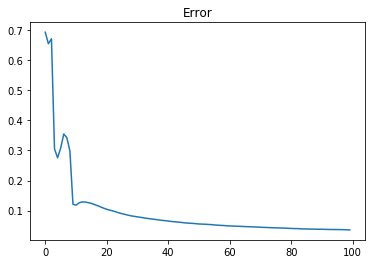

In [13]:
# prepare data to train model
x = X.T.values
y = Y.values.reshape(1, Y.size) # array([1, 0, 1, ..., 0, 0, 0]) to array([[1, 0, 1, ..., 0, 0, 0]])
                                # Y.shape: (7894,)   -   y.shape: (1, 7894)

# set number of nodes in our 1 hidden layer
nodes_hidden = 10
# set number of iterations to run the model
num_iterations = 100

# train the neural network
model = nerual_network(x, y, nodes_hidden, num_iterations)


## Prediction

In [14]:
def predict(X, parameters):
    '''
    Function to predict digit from image
    '''
    results = forward_propagation(X, parameters)
    predictions = np.around(results['Active2'])
    return predictions


In [15]:
predictions = predict(x, model)
print ('Train Accuracy: %d' % float((np.dot(y, predictions.T) + np.dot(1-y, 1-predictions.T))/float(y.size)*100) + '%')


Train Accuracy: 98%


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


In [16]:
# Get datapoint with only label 0 and 1
X_validation = validation[validation['label'].isin([0, 1])]

# Get only label 0 and 1
Y_validation = validation[validation['label'].isin([0, 1])]['label']

# Remove label from X.
X_validation = X_validation.drop(['label'], axis = 1)

x_validation = X_validation.T.as_matrix()
y_validation = Y_validation.values.reshape(1, Y_validation.size)

predictions_validation = predict(x_validation, model)
print ('Validation Accuracy: %d' % float((np.dot(y_validation, predictions_validation.T) + np.dot(1-y_validation, 1-predictions_validation.T))/float(y_validation.size)*100) + '%')


Validation Accuracy: 97%


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


#### Source: https://www.kaggle.com/shivamb/a-very-comprehensive-tutorial-nn-cnn